In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pytz

# **Introduction to the data**

In [101]:
# Load the dataset
data_path = 'EVChargingStationUsage.csv'  # Update this path if needed
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_50948/3522371862.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


## Data Preparation and Cleaning

In [102]:
# Overview of the dataset
data.info()
print('-' * 100)
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


In [103]:
# Check for missing values
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return

check_missing_values(data)

Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


In [104]:
# Data cleaning
threshold = 8000
cols_to_drop = data.columns[data.isnull().sum() > threshold]
data = data.drop(columns=cols_to_drop)

if 'Port Type' in data.columns:
    data['Port Type'] = data['Port Type'].fillna(data['Port Type'].mode()[0])

if 'Model Number' in data.columns:
    data['Model Number'] = data['Model Number'].fillna('Unknown')

if 'User ID' in data.columns:
    data = data.dropna(subset=['User ID'])
    data = data[pd.to_numeric(data['User ID'], errors='coerce').notnull()]
    data['User ID'] = data['User ID'].astype(int)

data = data.dropna()
print("Remaining missing values after cleaning:")
check_missing_values(data)

Remaining missing values after cleaning:
Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


In [105]:
# Convert datetime columns to datetime objects
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')
data['Transaction Date (Pacific Time)'] = pd.to_datetime(data['Transaction Date (Pacific Time)'], errors='coerce')

# Convert time durations to timedelta
data['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data['Total Duration (hh:mm:ss)'])
data['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data['Charging Time (hh:mm:ss)'])

# Convert durations to minutes
data['Total Charging Time (min)'] = data['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60
data['Total Duration (min)'] = data['Total Duration (hh:mm:ss)'].dt.total_seconds() / 60

# Calculate energy usage per minute
data['kWh per min'] = data['Energy (kWh)'] / data['Total Charging Time (min)']

# Add day of the week
data['Day of week'] = data['Start Date'].dt.dayofweek

# Add weekend vs. weekday column
data['Weekend/Weekday'] = data['Day of week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Add day vs. night column
data['Hour'] = data['Start Date'].dt.hour
data['Day/Night'] = data['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

## Feature Engineering for Clustering

In [106]:
# Map time zones
tz_mapping = {
    'PDT': 'US/Pacific',
    'PST': 'US/Pacific',
    'UTC': 'UTC'
}

# Localize and convert times to UTC
def localize_to_timezone(row, datetime_col, tz_col):
    tz_name = row[tz_col]
    timezone = pytz.timezone(tz_mapping.get(tz_name))
    return row[datetime_col].tz_localize(timezone, ambiguous='NaT', nonexistent='NaT')

data['Start Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'Start Date', 'Start Time Zone'), axis=1)
data['End Date Localized'] = data.apply(lambda row: localize_to_timezone(row, 'End Date', 'End Time Zone'), axis=1)
data['Start Date UTC'] = pd.to_datetime(data['Start Date Localized'], utc=True)
data['End Date UTC'] = pd.to_datetime(data['End Date Localized'], utc=True)

# Split events into hourly segments
def split_event_into_hours(row):
    start = row['Start Date UTC']
    end = row['End Date UTC']
    total_charging_time = row['Total Charging Time (min)']
    total_duration = row['Total Duration (min)']
    kWh_per_min = row['kWh per min']

    hourly_rows = []
    current_time = start.replace(minute=0, second=0, microsecond=0)

    while current_time < end:
        next_hour = current_time + pd.Timedelta(hours=1)
        charging_minutes = min((next_hour - start).total_seconds() / 60, total_charging_time) if start < next_hour else 0
        occupied_minutes = min((next_hour - start).total_seconds() / 60, total_duration) if start < next_hour else 0

        hourly_rows.append({
            'User ID': row['User ID'],
            'Station Name': row['Station Name'],
            'Hour': current_time,
            'Charging Time (min)': charging_minutes,
            'Occupied Time (min)': occupied_minutes,
            'Energy (kWh)': charging_minutes * kWh_per_min
        })

        current_time = next_hour

    return pd.DataFrame(hourly_rows)

hourly_data = pd.concat(data.apply(split_event_into_hours, axis=1).tolist(), ignore_index=True)

In [107]:
# Group hourly data by User ID, Station Name, Weekend/Weekday, and Day/Night
hourly_data['Day of week'] = hourly_data['Hour'].dt.dayofweek
hourly_data['Weekend/Weekday'] = hourly_data['Day of week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
hourly_data['Hour of day'] = hourly_data['Hour'].dt.hour
hourly_data['Day/Night'] = hourly_data['Hour of day'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

user_usage_patterns = hourly_data.groupby(['Station Name', 'Weekend/Weekday', 'Day/Night']).agg({
    'Charging Time (min)': 'sum',
    'Occupied Time (min)': 'sum',
    'Energy (kWh)': 'sum'
}).reset_index()

In [108]:
# Pivot the table for better readability
user_usage_pivot = user_usage_patterns.pivot_table(index=['Station Name'], columns=['Weekend/Weekday', 'Day/Night'],
                                                   values=['Charging Time (min)', 'Occupied Time (min)', 'Energy (kWh)'],
                                                   fill_value=0)

# Flatten the multi-level columns for easier access
user_usage_pivot.columns = ['_'.join(col).strip() for col in user_usage_pivot.columns.values]

# Display the pivot table
print("User Usage Patterns (Weekend vs Weekday, Day vs Night):")
user_usage_pivot

User Usage Patterns (Weekend vs Weekday, Day vs Night):


,Charging Time (min)_Weekday_Day,Charging Time (min)_Weekday_Night,Charging Time (min)_Weekend_Day,Charging Time (min)_Weekend_Night,Energy (kWh)_Weekday_Day,Energy (kWh)_Weekday_Night,Energy (kWh)_Weekend_Day,Energy (kWh)_Weekend_Night,Occupied Time (min)_Weekday_Day,Occupied Time (min)_Weekday_Night,Occupied Time (min)_Weekend_Day,Occupied Time (min)_Weekend_Night
Station Name,,,,,,,,,,,,
PALO ALTO CA / BRYANT # 1,4.044800e+03,5.270067e+03,28.100000,5.310000e+02,393.533008,495.978176,2.830000,40.716702,1.020027e+04,6.720950e+03,2.828333e+01,5.319167e+02
PALO ALTO CA / BRYANT #1,1.517255e+06,2.480607e+06,397129.850000,7.243189e+05,85769.472909,146990.017960,22972.002641,46447.372466,2.090036e+06,2.774746e+06,6.408172e+05,9.333742e+05
PALO ALTO CA / BRYANT #2,1.605358e+06,2.585631e+06,495508.650000,7.901695e+05,91170.033277,155200.901466,29579.451833,48833.765245,2.442485e+06,3.099280e+06,9.043816e+05,1.129966e+06
PALO ALTO CA / BRYANT #3,3.643064e+05,8.615624e+05,121729.266667,2.418314e+05,24373.314546,61984.198114,8087.872723,17460.647252,4.975028e+05,9.585702e+05,2.048937e+05,3.052254e+05
PALO ALTO CA / BRYANT #4,1.642677e+05,8.307107e+05,45887.883333,1.873880e+05,12258.981531,67534.156216,3542.318539,14807.930829,1.910374e+05,9.061335e+05,6.507472e+04,2.067575e+05
PALO ALTO CA / BRYANT #5,2.121966e+05,1.069603e+06,82995.433333,2.925191e+05,17186.007800,81406.008026,6242.153166,23588.723857,2.455934e+05,1.170226e+06,1.074724e+05,3.193214e+05
PALO ALTO CA / BRYANT #6,3.984481e+05,1.213480e+06,65842.483333,3.144717e+05,30340.080523,86918.467729,5887.859632,25042.323559,4.549832e+05,1.367022e+06,8.385923e+04,3.514668e+05
PALO ALTO CA / CAMBRIDGE #1,8.838196e+05,1.833093e+06,265940.433333,5.249101e+05,52740.408305,117175.975916,17809.322085,35367.182661,1.376908e+06,2.258591e+06,4.931077e+05,7.398024e+05
PALO ALTO CA / CAMBRIDGE #2,7.882662e+05,1.694312e+06,150064.150000,3.816220e+05,46150.689916,100938.644496,9747.031774,24797.218966,1.248546e+06,2.106085e+06,3.577831e+05,5.903077e+05


In [109]:
user_usage_pivot.to_csv('user_usage_patterns.csv')

## **Data visualization**

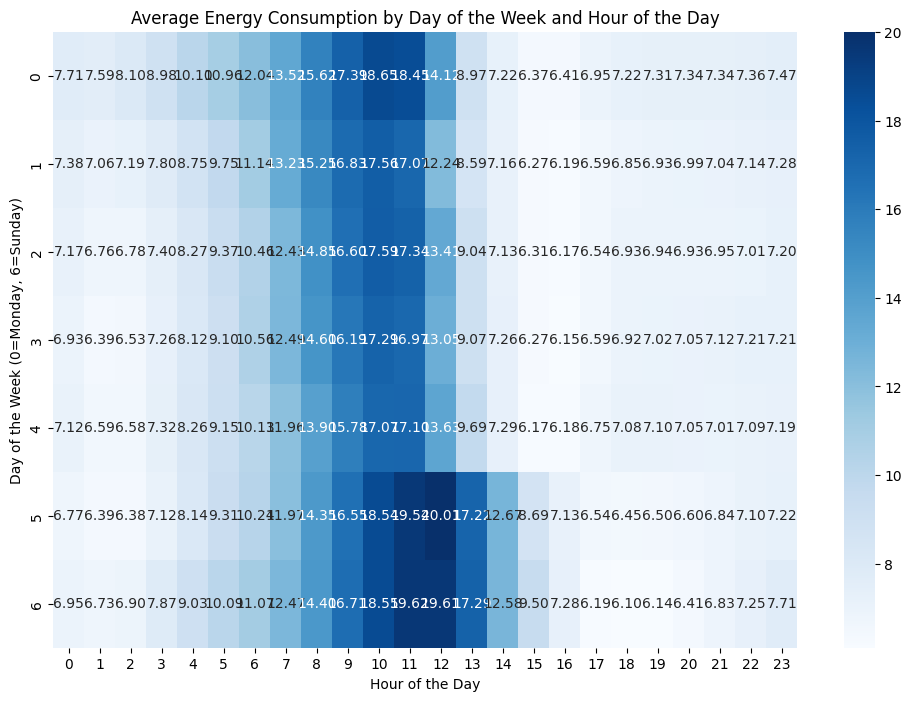

In [110]:
# Add this after loading and preparing your data
plt.figure(figsize=(12, 8))
pivot_energy = hourly_data.pivot_table(values='Energy (kWh)', index='Day of week', columns='Hour of day', aggfunc='mean')
sns.heatmap(pivot_energy, cmap='Blues', annot=True, fmt=".2f")
plt.title('Average Energy Consumption by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')
plt.show()

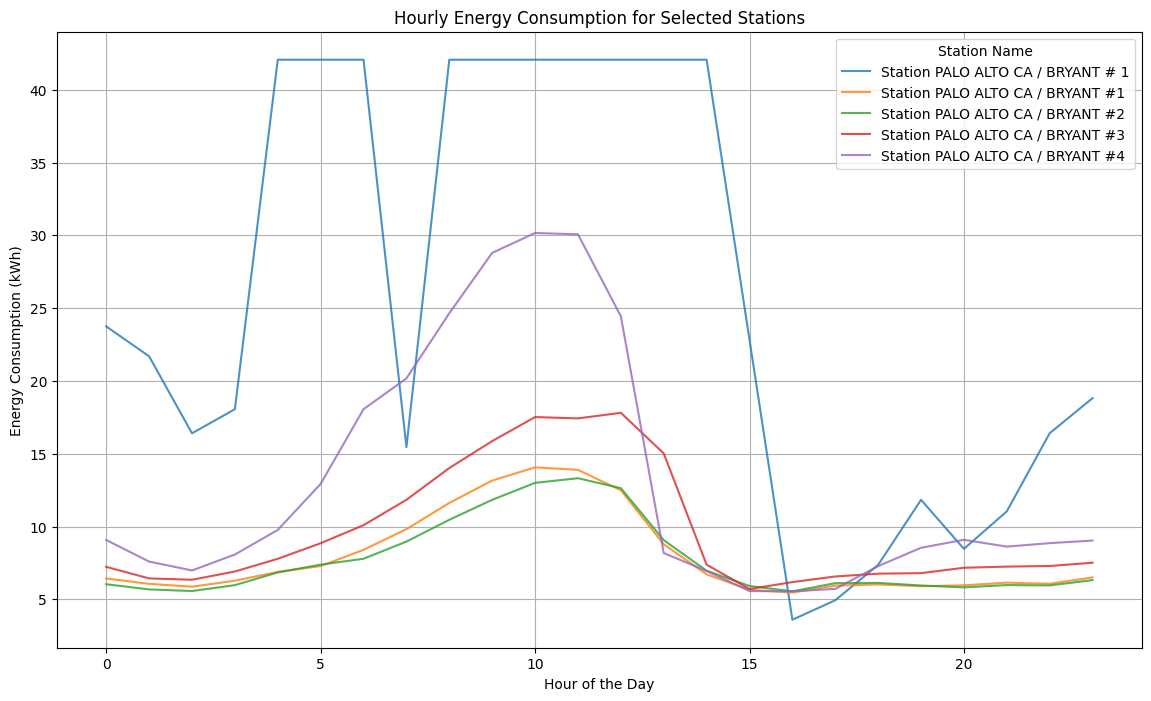

In [111]:
# Plotting energy usage comparison for multiple stations
station_groups = hourly_data.groupby(['Station Name', 'Hour of day']).agg({'Energy (kWh)': 'mean'}).reset_index()
stations_to_plot = station_groups['Station Name'].unique()[:5]  # Plot for first 5 stations to make it clear

plt.figure(figsize=(14, 8))
for station in stations_to_plot:
    station_data = station_groups[station_groups['Station Name'] == station]
    plt.plot(station_data['Hour of day'], station_data['Energy (kWh)'], label=f'Station {station}', alpha=0.8)

plt.title('Hourly Energy Consumption for Selected Stations')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(title='Station Name')
plt.grid()
plt.show()

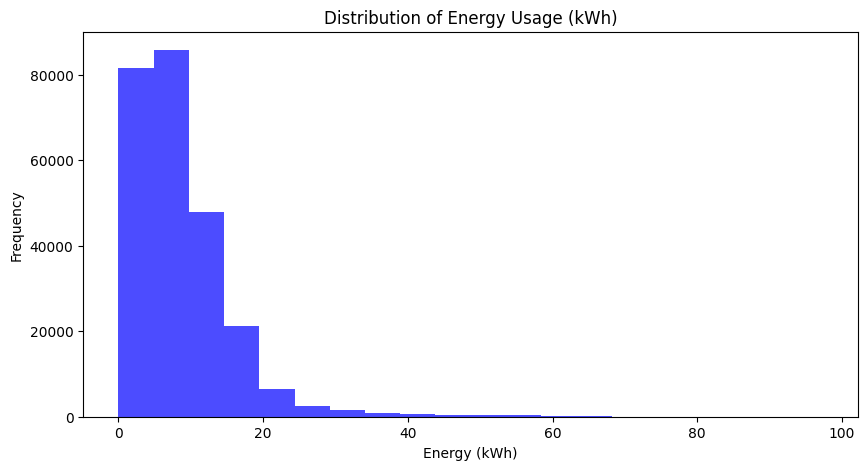

In [112]:
# Histogram for 'Energy (kWh)'
plt.figure(figsize=(10, 5))
data['Energy (kWh)'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Energy Usage (kWh)')
plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

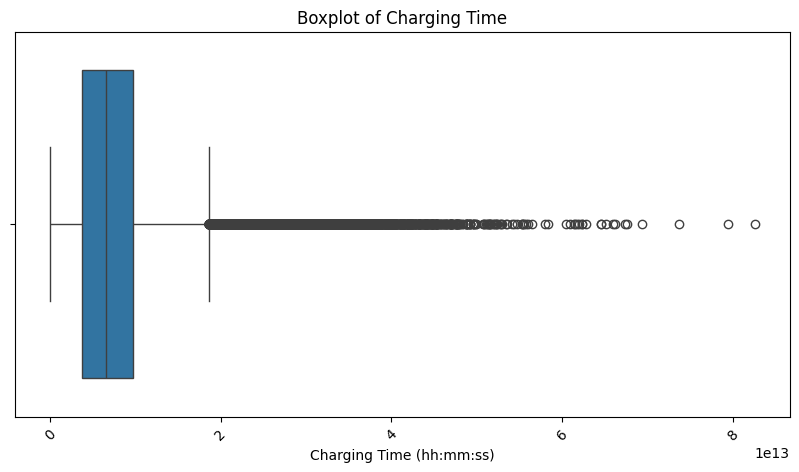

In [113]:
# Boxplot for 'Charging Time (hh:mm:ss)' to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x='Charging Time (hh:mm:ss)', data=data)
plt.title('Boxplot of Charging Time')
plt.xticks(rotation=45)
plt.show()

/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_50948/686459813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Port Type', data=data, palette='viridis')


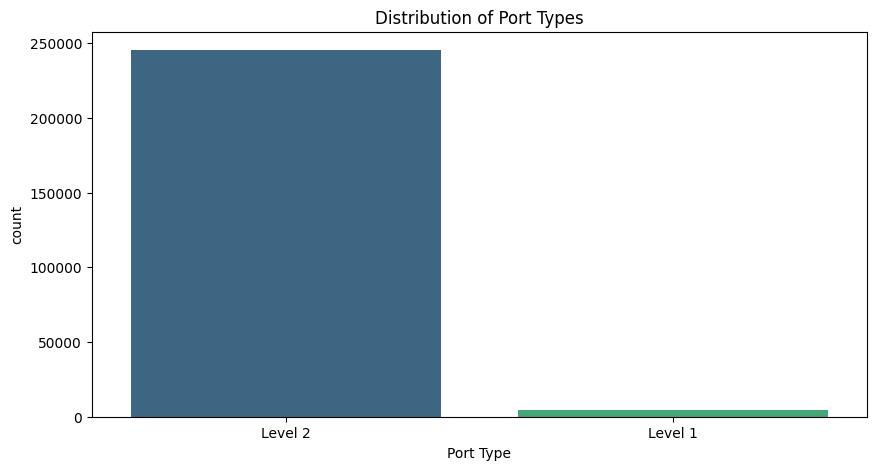

Column 'Model Number' does not exist in the dataframe.


In [114]:
# Categorical Analysis: Count plots for categorical features
plt.figure(figsize=(10, 5))
sns.countplot(x='Port Type', data=data, palette='viridis')
plt.title('Distribution of Port Types')
plt.show()

if 'Model Number' in data.columns:
	plt.figure(figsize=(12, 5))
	sns.countplot(x='Model Number', data=data, palette='Set2')
	plt.title('Distribution of Model Numbers')
	plt.xticks(rotation=45)
	plt.show()
else:
	print("Column 'Model Number' does not exist in the dataframe.")

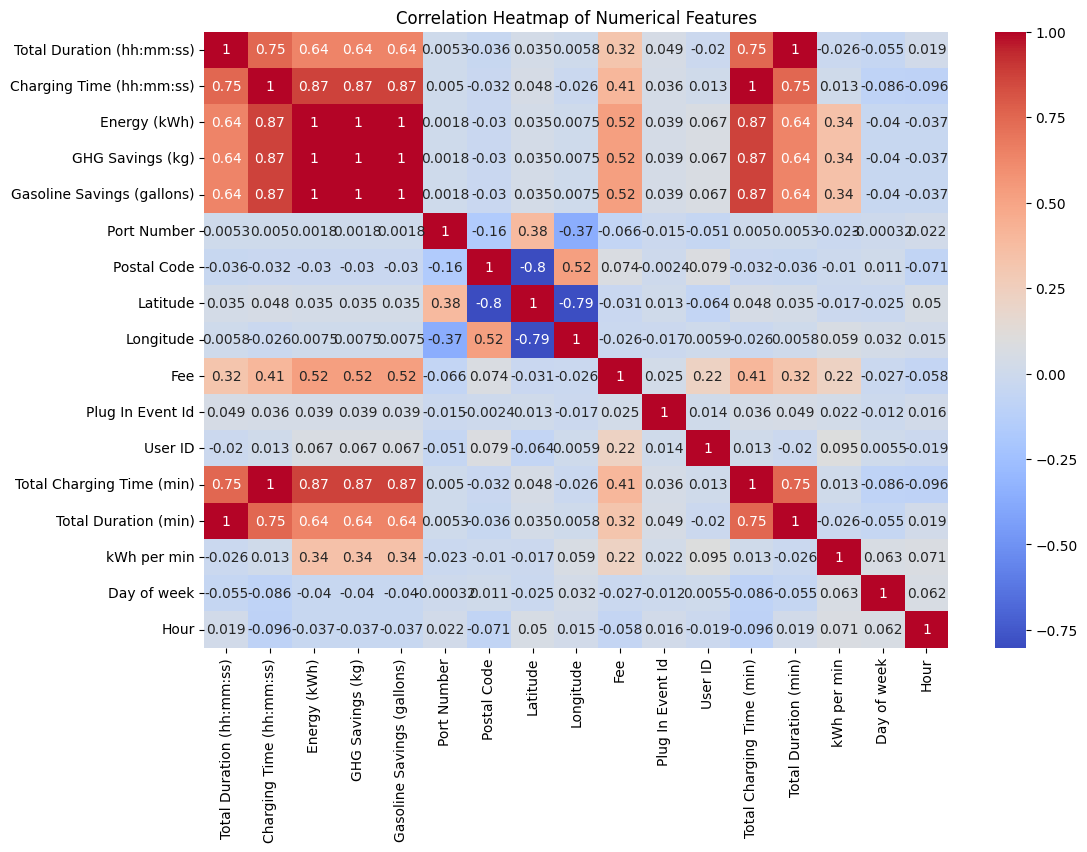

In [115]:
# Correlation Heatmap for numerical features
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## **Mandatory Component**
---

### **1: Cluster**

### Clustering Analysis

In [116]:
# Clustering based on the new features
features_to_scale = user_usage_pivot.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

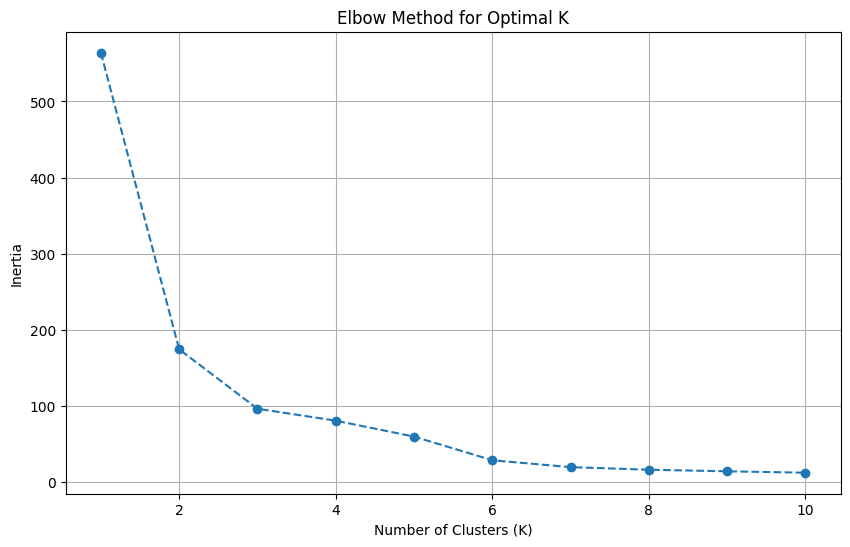

In [117]:
# Elbow Method for Determining Optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [118]:
# Apply KMeans Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [119]:
# Add cluster labels to the user usage pivot table
user_usage_pivot['Cluster'] = clusters

In [120]:
# Display clustered data
print("Clustered User Usage Patterns:")
user_usage_pivot

Clustered User Usage Patterns:


,Charging Time (min)_Weekday_Day,Charging Time (min)_Weekday_Night,Charging Time (min)_Weekend_Day,Charging Time (min)_Weekend_Night,Energy (kWh)_Weekday_Day,Energy (kWh)_Weekday_Night,Energy (kWh)_Weekend_Day,Energy (kWh)_Weekend_Night,Occupied Time (min)_Weekday_Day,Occupied Time (min)_Weekday_Night,Occupied Time (min)_Weekend_Day,Occupied Time (min)_Weekend_Night,Cluster
Station Name,,,,,,,,,,,,,
PALO ALTO CA / BRYANT # 1,4.044800e+03,5.270067e+03,28.100000,5.310000e+02,393.533008,495.978176,2.830000,40.716702,1.020027e+04,6.720950e+03,2.828333e+01,5.319167e+02,1
PALO ALTO CA / BRYANT #1,1.517255e+06,2.480607e+06,397129.850000,7.243189e+05,85769.472909,146990.017960,22972.002641,46447.372466,2.090036e+06,2.774746e+06,6.408172e+05,9.333742e+05,2
PALO ALTO CA / BRYANT #2,1.605358e+06,2.585631e+06,495508.650000,7.901695e+05,91170.033277,155200.901466,29579.451833,48833.765245,2.442485e+06,3.099280e+06,9.043816e+05,1.129966e+06,2
PALO ALTO CA / BRYANT #3,3.643064e+05,8.615624e+05,121729.266667,2.418314e+05,24373.314546,61984.198114,8087.872723,17460.647252,4.975028e+05,9.585702e+05,2.048937e+05,3.052254e+05,1
PALO ALTO CA / BRYANT #4,1.642677e+05,8.307107e+05,45887.883333,1.873880e+05,12258.981531,67534.156216,3542.318539,14807.930829,1.910374e+05,9.061335e+05,6.507472e+04,2.067575e+05,1
PALO ALTO CA / BRYANT #5,2.121966e+05,1.069603e+06,82995.433333,2.925191e+05,17186.007800,81406.008026,6242.153166,23588.723857,2.455934e+05,1.170226e+06,1.074724e+05,3.193214e+05,1
PALO ALTO CA / BRYANT #6,3.984481e+05,1.213480e+06,65842.483333,3.144717e+05,30340.080523,86918.467729,5887.859632,25042.323559,4.549832e+05,1.367022e+06,8.385923e+04,3.514668e+05,1
PALO ALTO CA / CAMBRIDGE #1,8.838196e+05,1.833093e+06,265940.433333,5.249101e+05,52740.408305,117175.975916,17809.322085,35367.182661,1.376908e+06,2.258591e+06,4.931077e+05,7.398024e+05,0
PALO ALTO CA / CAMBRIDGE #2,7.882662e+05,1.694312e+06,150064.150000,3.816220e+05,46150.689916,100938.644496,9747.031774,24797.218966,1.248546e+06,2.106085e+06,3.577831e+05,5.903077e+05,0


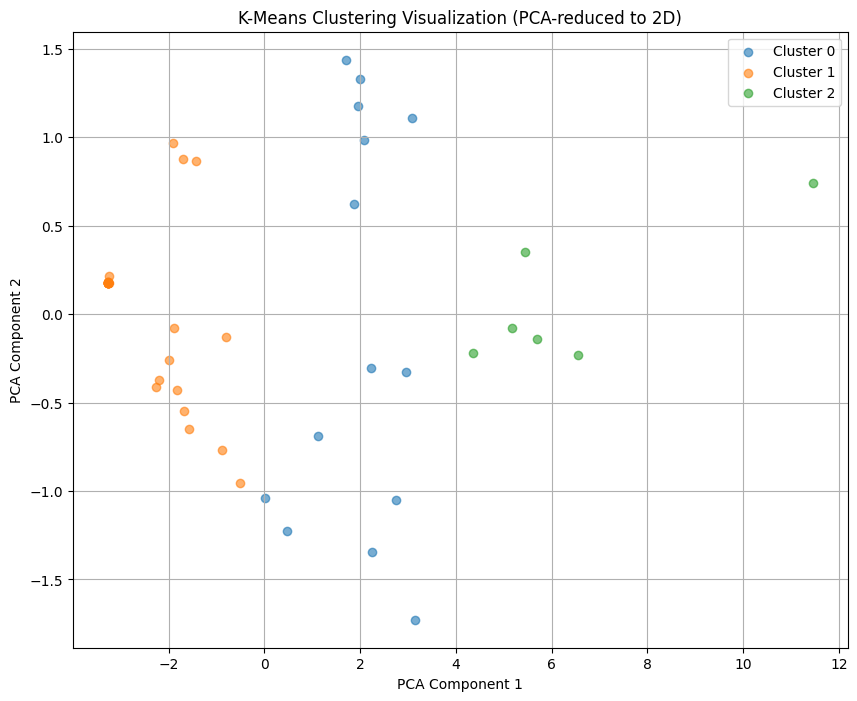

In [121]:
# Plot cluster visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_points = reduced_data[user_usage_pivot['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (PCA-reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

### Evaluating and Visualizing Clusters

In [122]:
# Silhouette Score for Evaluating Clustering Quality
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score for K={optimal_k}: {silhouette_avg}")

Silhouette Score for K=3: 0.5971669793384567


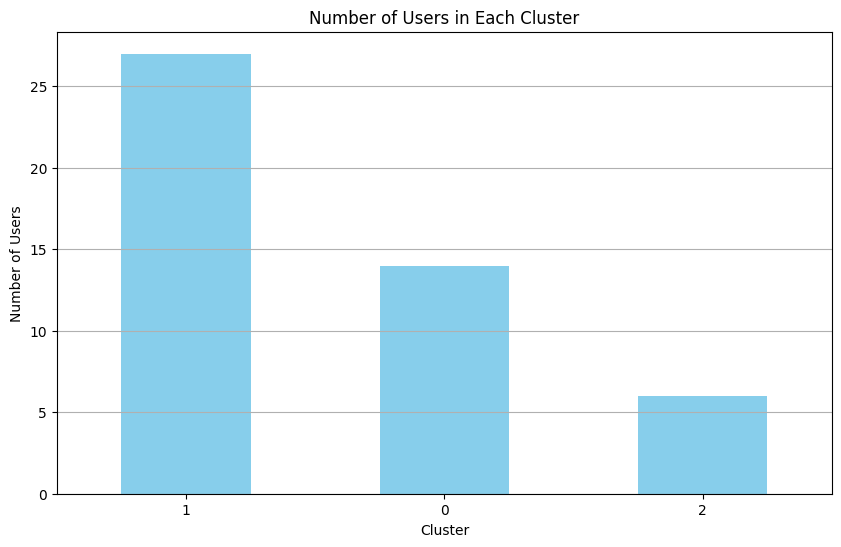

In [123]:
# Plot: Cluster Size Distribution
cluster_counts = user_usage_pivot['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Understanding the Clusters

<Figure size 1400x800 with 0 Axes>

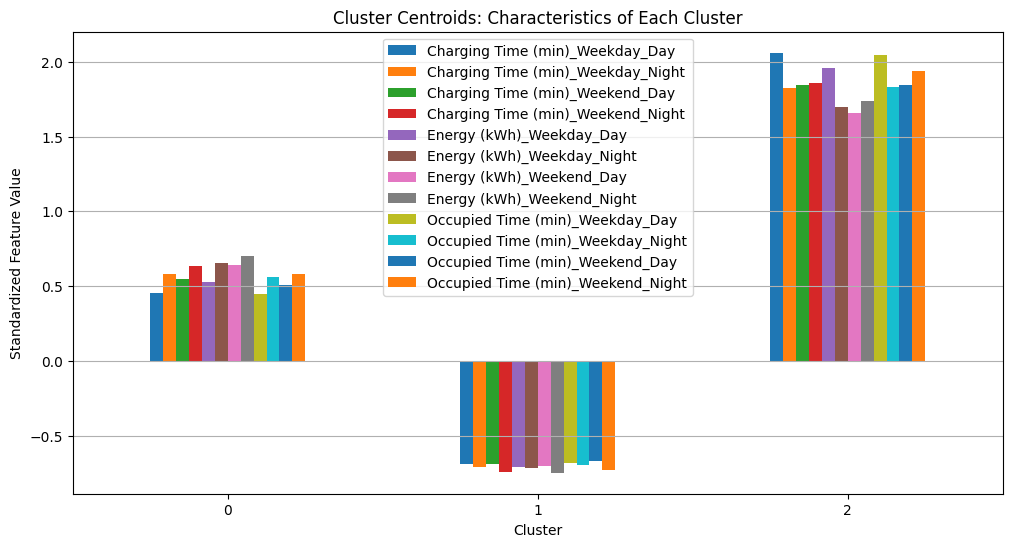

In [124]:
# Plot: Cluster Centroid Characteristics
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=features_to_scale.columns)

plt.figure(figsize=(14, 8))
centroid_df.plot(kind='bar', figsize=(12, 6))
plt.title('Cluster Centroids: Characteristics of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Feature Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Cluster Interpretation

In [125]:
# Cluster Interpretation
cluster_descriptions = []

# Print available columns to check for correct names
print("Available columns in centroid_df:", centroid_df.columns)

for idx, centroid in centroid_df.iterrows():
    # Adjust the column names here based on actual names in centroid_df
    if 'Energy (kWh)' in centroid_df.columns:
        if centroid['Energy (kWh)'] > 1.0:
            energy_desc = "high energy usage"
        else:
            energy_desc = "low energy usage"
    else:
        energy_desc = "unknown energy usage"

    if 'Charging Time (min)' in centroid_df.columns:
        if centroid['Charging Time (min)'] > 60:
            charge_desc = "long charging durations"
        else:
            charge_desc = "short charging durations"
    else:
        charge_desc = "unknown charging durations"

    if 'Weekend/Weekday_Weekend' in centroid_df.columns and 'Weekend/Weekday_Weekday' in centroid_df.columns:
        if centroid['Weekend/Weekday_Weekend'] > centroid['Weekend/Weekday_Weekday']:
            time_desc = "prefers charging on weekends"
        else:
            time_desc = "prefers charging on weekdays"
    else:
        time_desc = "unknown charging preference"

    cluster_description = f"Cluster {idx}: {energy_desc}, {charge_desc}, and {time_desc}."
    cluster_descriptions.append(cluster_description)
    print(cluster_description)

Available columns in centroid_df: Index(['Charging Time (min)_Weekday_Day', 'Charging Time (min)_Weekday_Night',
       'Charging Time (min)_Weekend_Day', 'Charging Time (min)_Weekend_Night',
       'Energy (kWh)_Weekday_Day', 'Energy (kWh)_Weekday_Night',
       'Energy (kWh)_Weekend_Day', 'Energy (kWh)_Weekend_Night',
       'Occupied Time (min)_Weekday_Day', 'Occupied Time (min)_Weekday_Night',
       'Occupied Time (min)_Weekend_Day', 'Occupied Time (min)_Weekend_Night'],
      dtype='object')
Cluster 0: unknown energy usage, unknown charging durations, and unknown charging preference.
Cluster 1: unknown energy usage, unknown charging durations, and unknown charging preference.
Cluster 2: unknown energy usage, unknown charging durations, and unknown charging preference.


In [126]:
# Actionable Recommendations
print("\nRecommendations:")
for idx, description in enumerate(cluster_descriptions):
    if "high energy usage" in description and "long charging durations" in description:
        recommendation = f"Cluster {idx}: Consider offering discounts or incentives for charging during off-peak hours to balance grid load."
    elif "low energy usage" in description and "prefers charging on weekends" in description:
        recommendation = f"Cluster {idx}: Provide weekend promotional offers to increase station utilization."
    else:
        recommendation = f"Cluster {idx}: Monitor charging behavior and offer personalized suggestions to improve station usage."
    print(recommendation)


Recommendations:
Cluster 0: Monitor charging behavior and offer personalized suggestions to improve station usage.
Cluster 1: Monitor charging behavior and offer personalized suggestions to improve station usage.
Cluster 2: Monitor charging behavior and offer personalized suggestions to improve station usage.


### **2: Prediction model**

## **Exploratory Component**
---

In [127]:
# Check if 'Model Number' exists in the DataFrame
if 'Model Number' not in data.columns:
    print("The 'Model Number' column is missing. Adding it with default values.")
    # Add the 'Model Number' column with a default value of 'Unknown'
    data['Model Number'] = 'Unknown'

# If 'Model Number' exists, handle missing values
data['Model Number'] = data['Model Number'].fillna('Unknown')

# Verify that the column has been restored and no missing values remain
print(data['Model Number'].isnull().sum())  # Should print 0
print(data['Model Number'].head())  # Show the first few values for verification

The 'Model Number' column is missing. Adding it with default values.
0
0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: Model Number, dtype: object


In [128]:
# Data Cleaning: Handling missing values
# Fill missing 'Port Type' with the most frequent value
data['Port Type'] = data['Port Type'].fillna(data['Port Type'].mode()[0])
print("Filled missing values for 'Port Type'.")

# Replace missing 'Model Number' with 'Unknown'
data['Model Number'] = data['Model Number'].fillna('Unknown')
print("Replaced missing 'Model Number' with 'Unknown'.")

# Drop rows with missing 'User ID'
data = data.dropna(subset=['User ID'])
print("Dropped rows with missing 'User ID'.")

# Convert 'User ID' to integer type for consistency
data = data[pd.to_numeric(data['User ID'], errors='coerce').notnull()]
data['User ID'] = data['User ID'].astype(int)

Filled missing values for 'Port Type'.
Replaced missing 'Model Number' with 'Unknown'.
Dropped rows with missing 'User ID'.


In [129]:
# Keep only necessary columns
focused_data = data[['User ID', 'Model Number', 'Port Type']]

# Sort the data by 'User ID'
focused_data = focused_data.sort_values(by='User ID')
focused_data

,User ID,Model Number,Port Type
40166,0,Unknown,Level 2
5244,0,Unknown,Level 2
32517,0,Unknown,Level 2
32462,0,Unknown,Level 2
5236,0,Unknown,Level 2
...,...,...,...
259227,23065631,Unknown,Level 2
259405,23082221,Unknown,Level 2
259263,23099981,Unknown,Level 2
259372,23127081,Unknown,Level 2


In [130]:
# Check if there are missing values in the focused dataset
model_port_focused_data = focused_data.isnull().sum()
model_port_focused_data

User ID         0
Model Number    0
Port Type       0
dtype: int64

In [131]:
# One-hot encode 'Model Number' and 'Port Type'
one_hot_encoded_data = pd.get_dummies(focused_data, columns=['Model Number', 'Port Type'])

# Aggregate features by User ID
aggregated_data = one_hot_encoded_data.groupby('User ID').sum()

# Display the first few rows of the feature-engineered dataset
print("Feature Engineered Dataset for Clustering:")
print(aggregated_data.head())

Feature Engineered Dataset for Clustering:
         Model Number_Unknown  Port Type_Level 1  Port Type_Level 2
User ID                                                            
0                         226                  1                225
102                         2                  0                  2
107                        11                  1                 10
111                        19                  1                 18
140                         4                  1                  3


In [132]:
# Exclude 'User ID' from scaling
features_to_scale = aggregated_data.drop(columns=['User ID'], errors='ignore')

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a DataFrame with scaled features
scaled_data = pd.DataFrame(scaled_features, index=aggregated_data.index, columns=features_to_scale.columns)

# Display the scaled dataset
print("Scaled Dataset for Clustering:")
print(scaled_data.head())

Scaled Dataset for Clustering:
         Model Number_Unknown  Port Type_Level 1  Port Type_Level 2
User ID                                                            
0                    4.797633           0.183791           4.883995
102                 -0.217353          -0.048514          -0.217308
107                 -0.015858           0.183791          -0.034302
111                  0.163249           0.183791           0.148704
140                 -0.172576           0.183791          -0.194433


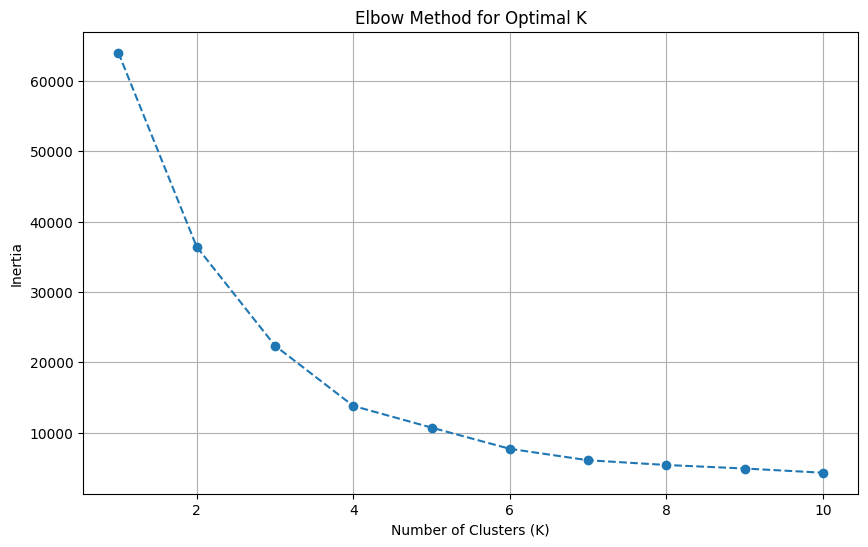

In [133]:
# Elbow Method for determining the optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

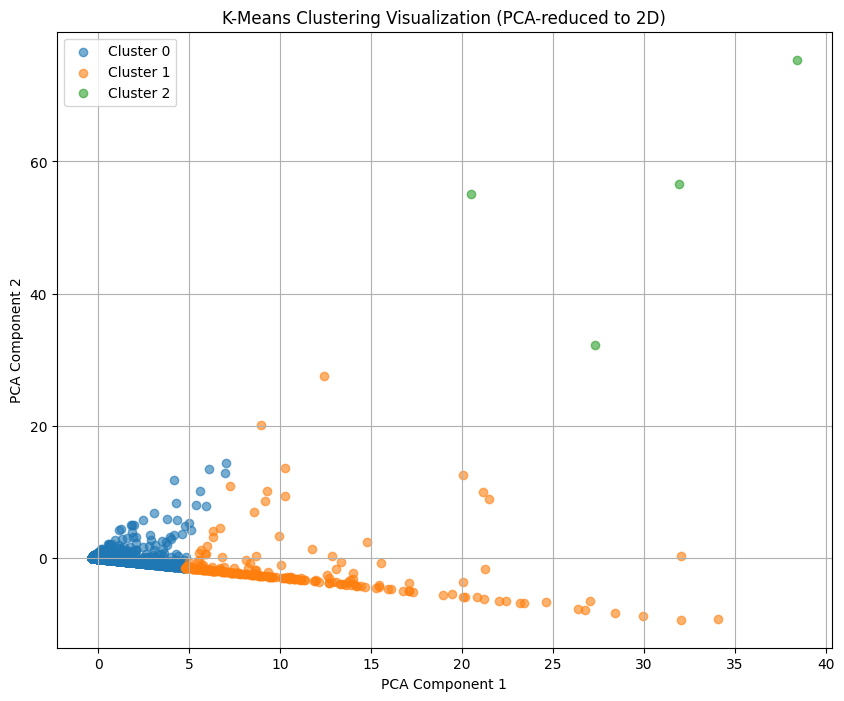

In [134]:
# Apply K-Means Clustering
optimal_k = 3  # Based on Elbow Plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# PCA for reducing dimensions to visualize clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
for cluster in range(optimal_k):
    cluster_points = reduced_data[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (PCA-reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

In [135]:
# Print available columns to understand the structure of cluster_summary
print(cluster_summary.columns)

Index(['Model Number_Unknown', 'Port Type_Level 1', 'Port Type_Level 2'], dtype='object')


In [136]:
# Recommendations based on clustering
print("\nRecommendations:")

for idx, description in cluster_summary.iterrows():
    if description['Port Type_Level 1'] > 1.0:
        print(f"Cluster {idx}: Consider providing incentives for off-peak charging.")
    else:
        print(f"Cluster {idx}: Users could be encouraged to use charging facilities more frequently.")


Recommendations:
Cluster 0: Users could be encouraged to use charging facilities more frequently.
Cluster 1: Consider providing incentives for off-peak charging.
Cluster 2: Consider providing incentives for off-peak charging.


Cluster Summary:
         Model Number_Unknown  Port Type_Level 1  Port Type_Level 2
Cluster                                                            
0                    7.774953           0.103700           7.671252
1                  324.647287           4.744186         319.903101
2                  556.000000         261.750000         294.250000


<Figure size 1400x700 with 0 Axes>

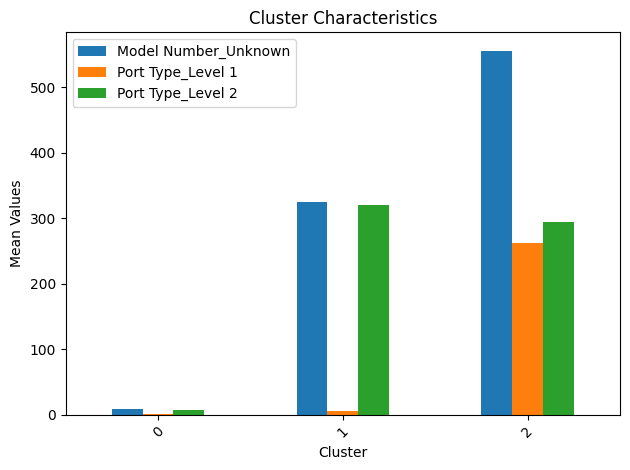


Recommendations:


KeyError: 'Energy (kWh)'

In [137]:
# Adding cluster labels to the original dataset
aggregated_data['Cluster'] = clusters

# Analyze the cluster characteristics
cluster_summary = aggregated_data.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Visualizing Cluster Characteristics
plt.figure(figsize=(14, 7))
cluster_summary.plot(kind='bar', title='Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Recommendations based on clustering
print("\nRecommendations:")
for idx, description in cluster_summary.iterrows():
    if description['Energy (kWh)'] > 1.0:
        print(f"Cluster {idx}: Consider providing incentives for off-peak charging.")
    else:
        print(f"Cluster {idx}: Users could be encouraged to use charging facilities more frequently.")

### **1: Infrastructure planning**

### **2: Campaigns to increase**

# **Conclusions**
---

# **Word Count**
---

In [ ]:
import json

with open('new.ipynb') as json_file:
    data = json.load(json_file)

print(data)

{'cells': [{'cell_type': 'code', 'execution_count': 2, 'metadata': {}, 'outputs': [], 'source': ['import pandas as pd\n', 'import numpy as np\n', 'import matplotlib.pyplot as plt\n', 'import seaborn as sns\n', 'from sklearn.preprocessing import StandardScaler, LabelEncoder\n', 'from sklearn.cluster import KMeans\n', 'from sklearn.metrics import silhouette_score\n', 'from sklearn.decomposition import PCA\n', 'import pytz']}, {'cell_type': 'code', 'execution_count': 3, 'metadata': {}, 'outputs': [{'name': 'stderr', 'output_type': 'stream', 'text': ['/var/folders/m7/5qwtqvds6bs3g6xjkfmmxmqr0000gn/T/ipykernel_44567/3522371862.py:3: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.\n', '  data = pd.read_csv(data_path)\n']}, {'data': {'text/html': ['<div>\n', '<style scoped>\n', '    .dataframe tbody tr th:only-of-type {\n', '        vertical-align: middle;\n', '    }\n', '\n', '    .dataframe tbody tr th {\n', '        vertical-align:

In [ ]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount)

27


---

Max 2 sider

In [ ]:
A4_tegn = 2400
to_sider = A4_tegn * 2
print(to_sider)

4800
